In [17]:
import cv2
import torch
import matplotlib.pyplot as plt
import glob
import random
from transformers import pipeline
from PIL import Image
import numpy as np

In [9]:
# load pipe
pipe = pipeline(task="depth-estimation", model="LiheYoung/depth-anything-small-hf")

In [38]:
imgs = glob.glob("../pyronear_cam_data/**/*.jpg")
len(imgs)

680

../pyronear_cam_data/brison_4/pyronear_brison_4_2023_10_14T15_54_43.jpg


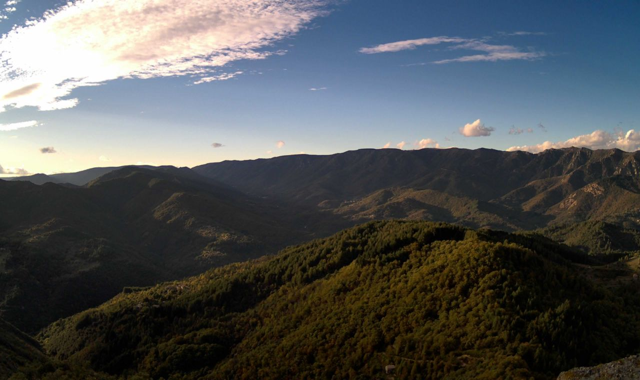

In [47]:
# Pick a random image
file = random.choice(imgs)
print(file)
# Compute depth using midas
img = Image.open(file)
img.resize((640,380))

In [48]:
# inference
depth = pipe(img)["depth"]


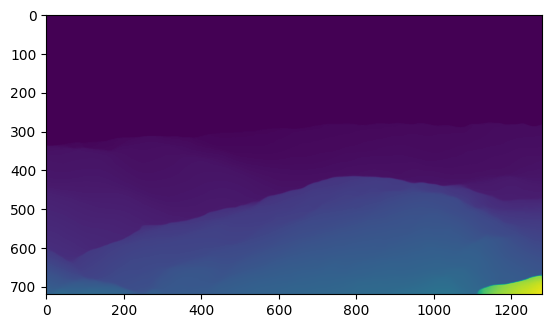

In [49]:
plt.imshow(np.array(depth))

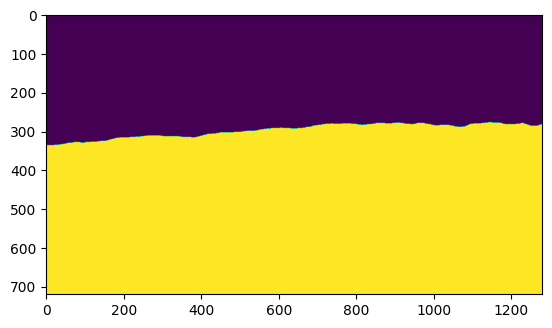

In [50]:
# Threshold depth 
th = 0
(T, res) = cv2.threshold(np.array(depth), th, 255, cv2.THRESH_BINARY)
plt.imshow(res)

In [51]:
img_np = np.array(img)

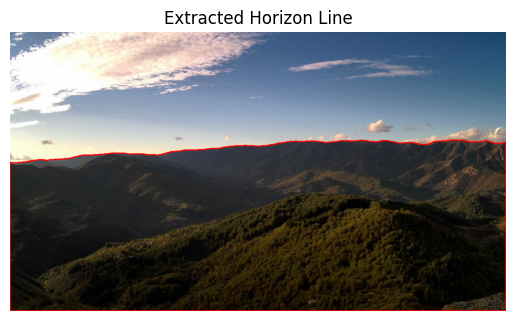

In [52]:
mask_image = res.astype("uint8")

# Threshold the image to make sure it's binary
_, binary_mask = cv2.threshold(mask_image, 127, 255, cv2.THRESH_BINARY)

# Find contours in the binary mask; the largest contour should correspond to the boundary between the sky and the land
contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Assuming the largest contour is the horizon line
# Sort the contours by area and get the largest one
horizon_contour = max(contours, key=cv2.contourArea)


# Draw the horizon contour directly on the color image
img_line = cv2.drawContours(img_np.astype("uint8"), [horizon_contour], -1, (255, 0, 0), thickness=2)  # Red color for visibility

# Let's display the contour image
plt.imshow(img_line)
plt.title('Extracted Horizon Line')
plt.axis('off')
plt.show()
